# Homework 10

## Q1

## Gaussian Processes

Gaussian processes can be seen as an infinite-dimensional generalization of multivariate normal distributions. It's a distribution over functions.

Regression is used to find a function (line)that represents a set of data points as closely as possible;

A Gaussian process is a probabilistic method that gives a confidence(shaded) for the predicted function, But they are not limited to regression — they can also be extended to classification and clustering tasks

For a given set of training points, there are potentially infinitely many functions that fit the data. Gaussian processes offer an elegant solution to this problem by assigning a probability to each of these functions.

Gaussian distributions have the nice algebraic property of being **closed under conditioning and marginalization**, which makes many problems in statistics and machine learning tractable:

$$P_{X,Y} = 
\begin{bmatrix}
X \\
Y
\end{bmatrix}
\sim \mathcal{N}(\mu, \Sigma) = 
\mathcal{N} \left(
\begin{bmatrix}
\mu_X \\
\mu_Y
\end{bmatrix},
\begin{bmatrix}
\Sigma_{XX} & \Sigma_{XY} \\
\Sigma_{YX} & \Sigma_{YY}
\end{bmatrix}
\right)$$,

where $X$ and $Y$ represent disjoint subsets of original random variables, then

$$
X \sim \mathcal{N}(\mu_X, \Sigma_{XX})
$$

$$
Y \sim \mathcal{N}(\mu_Y, \Sigma_{YY})
$$

and 

$$
X \mid Y \sim \mathcal{N} \left(
\mu_X + \Sigma_{XY} \Sigma_{YY}^{-1}(Y - \mu_Y),\;
\Sigma_{XX} - \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX}
\right)
$$

$$
Y \mid X \sim \mathcal{N} \left(
\underbrace{\mu_Y + \Sigma_{YX} \Sigma_{XX}^{-1}(X - \mu_X)}_{\text{depends on}\, X},\;
\underbrace{\Sigma_{YY} - \Sigma_{YX} \Sigma_{XX}^{-1} \Sigma_{XY}}_{\text{fixed, independent of}\, X}
\right)
$$

Note that the expression updates the mean of $Y$ (shifts the location) based on how far the observed $X$ deviates from its mean. But the covariance matrix (shape) is deterministic. So how uncertain you are about $Y$, given that you’ve observed something from $X$, is a **structural property** of the covariance — not of the specific observed value.

Rather than finding an implicit function, we are interested in predicting the function values at concrete points, which we call *test points* $X$.

When you model with a **Gaussian Process**, you’re placing a prior:

$$
f(x) \sim \mathcal{GP}(\mu(x),\, k(x, x'))
$$

This implies:

- Any finite set of function values $ \left( f(x_1), \dots, f(x_n) \right) $ is jointly Gaussian  
- All predictions are conditionally Gaussian  
- You are assuming **smooth functions**, based on the choice of kernel \(k\)


### ✦ Stochastic Process

A **stochastic process** is a collection of random variables indexed by some set, often time or space.

Formally:
$$
\{X_t : t \in T\}
$$

Each $X_t$ is a random variable, and $T$ is the index set (e.g., time, spatial position, input features).



### ✦ Gaussian Process

A **Gaussian Process** (GP) is a stochastic process where **every finite collection of variables** is jointly Gaussian.

Formally:
$$
f(x) \sim \mathcal{GP}(\mu(x), k(x, x'))
$$

<!-- This means that for any set of inputs $ x_1, \dots, x_n $, the outputs
$$
(f(x_1), \dots, f(x_n)) \sim \mathcal{N}(\mu, \Sigma)
$$
where $ \mu_i = \mu(x_i) $ and $ \Sigma_{ij} = k(x_i, x_j) $. -->

For each input $x_i$, the GP defines a **random variable** $f(x_i)$, with expectation $\mu(x_i)$ and variance $k(x_i, x_i)$.

So a GP defines a **distribution over functions**:

$$
f : \mathcal{X} \to \mathbb{R}
$$

where $\mathcal{X}$ is the input space (e.g., $\mathbb{R}^d$).

For any finite collection $x_1, \dots, x_n \in \mathcal{X}$, the vector $(f(x_1), \dots, f(x_n))$ follows a multivariate Gaussian distribution:

$$
(f(x_1), \dots, f(x_n)) \sim \mathcal{N}(\mu, \Sigma)
$$

This distribution is fully specified by:
- a mean ***function*** $\mu(x) = \mathbb{E}[f(x)]$ *( typically 0，but we can always assume such a distribution, even if $\mu \neq 0$, and add it back to the resulting function values after the prediction step. This process is also called **centering** of the data. )*

- a kernel (covariance ***function***) $k(x, x') = \text{Cov}(f(x), f(x'))$  $\quad k: \mathbb{R}^n \times \mathbb{R}^n \to \mathbb{R}$

The kernel receives two points $t, t' \in \mathbb{R}$ as an input and returns a **similarity measure** between those points in the form of a scalar.
  
Since the kernel describes the similarity between the values of our function, *it controls the possible shape that a fitted function can adopt.*



Placing a GP prior over functions imposes a **structural bias** on our belief of the function.

In particular, the choice of kernel $k$ restricts the function class. For example:

- The **RBF kernel** (also known as the squared exponential kernel) implies:
  - The function is **infinitely differentiable**
  - Small changes in $x$ lead to small, correlated changes in $f(x)$
  - This results in very smooth, wiggly functions that interpolate smoothly between points
  - The kernel has the form:
    $$
    k(x, x') = \exp\left(-\frac{(x - x')^2}{2\ell^2}\right)
    $$
    where $\ell$ is the length-scale hyperparameter

- A **Matérn kernel** with smoothness parameter $\nu = \frac{3}{2}$ implies:
  - The function is **once-differentiable** (less smooth than RBF)
  - You get rougher, more "real-world"-looking functions
  - The kernel form is:
    $$
    k(x, x') = \left(1 + \frac{\sqrt{3}|x - x'|}{\ell}\right)\exp\left(-\frac{\sqrt{3}|x - x'|}{\ell}\right)
    $$

- A **linear kernel** implies:
  - The function is linear (or affine) in input space
  - This is equivalent to Bayesian linear regression
  - The kernel has the form:
    $$
    k(x, x') = \sigma_b^2 + \sigma_v^2 \cdot x x'
    $$
    where $\sigma_b^2$ and $\sigma_v^2$ control bias and variance


Thus, using a GP amounts to assuming that the underlying function comes from a specific family of functions characterized by the kernel. Specifying $\mu(x)$ and $k(x, x')$ fully determines the prior.



## Variational Inference and ELBO

In Bayesian inference, we are often interested in the posterior distribution $p(\theta \mid \mathcal{D})$ over parameters $\theta$ given data $\mathcal{D}$. However, computing this posterior exactly is often intractable due to the marginal likelihood $p(\mathcal{D}) = \int p(\mathcal{D}, \theta)\, d\theta$.

**Variational Inference (VI)** provides an optimization-based alternative. We posit a family of simpler distributions $q(\theta)$ and find the member that best approximates the true posterior by minimizing the Kullback–Leibler (KL) divergence:

$$\mathrm{KL}(q(\theta) \parallel p(\theta \mid \mathcal{D})) = \int q(\theta) \log \frac{q(\theta)}{p(\theta \mid \mathcal{D})} \, d\theta$$

This is equivalent to maximizing the **Evidence Lower Bound (ELBO)**:

$$
\text{ELBO}(q) = \mathbb{E}_{q(\theta)}[\log p(\mathcal{D}, \theta)] - \mathbb{E}_{q(\theta)}[\log q(\theta)]
$$

or equivalently:

$$
\text{ELBO}(q) = \log p(\mathcal{D}) - \mathrm{KL}(q(\theta) \parallel p(\theta \mid \mathcal{D}))
$$

Since $\log p(\mathcal{D})$ is constant with respect to $q$, maximizing the ELBO is equivalent to minimizing the KL divergence.

---

**Goal of VI:**  
Find $q^*(\theta) = \arg\max_q \text{ELBO}(q)$

The variational approximation $q^*(\theta)$ then serves as a tractable substitute for the true posterior.


## Q2 GP

In [3]:
pip install meteostat

  Using cached meteostat-1.6.8-py3-none-any.whl.metadata (4.6 kB)
Using cached meteostat-1.6.8-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

from meteostat import Daily, Stations
from datetime import datetime

In [3]:
from meteostat import Stations

stations = Stations()
stations = stations.nearby(43.6667, -79.4)  # Toronto
stations = stations.inventory('daily')
stations_df = stations.fetch(15)

print(stations_df[['name', 'latitude', 'longitude']])



                                        name  latitude  longitude
id                                                               
71508                           Toronto City   43.6700     -79.40
71265                 Toronto Island Airport   43.6333     -79.40
2XUGG                    Toronto City Centre   43.6300     -79.40
8PJPB               Toronto East York Dustan   43.7000     -79.34
NZY2Y                     Toronto North York   43.7800     -79.47
71624  Toronto Pearson International Airport   43.6800     -79.63
71639            Toronto Buttonville Airport   43.8600     -79.37
75BU2                           Oakville Twn   43.5100     -79.69
8IOCM                        King City North   43.9600     -79.57
EEE27                           Pa King City   43.9600     -79.57
CNR66                        Georgetown Wwtp   43.6400     -79.88
71432                            Port Weller   43.2500     -79.22
W3CDZ                                 Oshawa   43.9200     -78.88
7FGUJ     

In [59]:
# Toronto Island Airport station
station_id = '71265'
start = datetime(2014, 1, 1)
end   = datetime(2025, 3, 30)

data = Daily(station_id, start, end).fetch()
df = data[['tavg']].dropna().copy()
df['day_ordinal'] = df.index.map(lambda d: d.toordinal())
X_full = df['day_ordinal'].values
X_ref = X_full.min()


In [60]:
train_df = df[(df.index.year >= 2018) & (df.index.year <= 2022)].iloc[::7]  # every 7th day

X_train_raw = train_df['day_ordinal'].values[:, None]
X_train = (X_train_raw - X_ref) / 365
y_train = train_df['tavg'].values

# include all from 2018 to 2025
X_pred_raw = np.linspace(
    datetime(2018, 1, 1).toordinal(),  # start of training period
    datetime(2025, 12, 31).toordinal(),  # end of prediction period
    300
)[:, None]

X_pred = (X_pred_raw - X_ref) / 365
X_pred_dates = [datetime.fromordinal(int(x)) for x in X_pred_raw.flatten()]


In [17]:
with pm.Model() as gp_model:
    X_data = pm.MutableData("X_data", X_train)
    y_data = pm.MutableData("y_data", y_train)

    length_scale = pm.HalfNormal("length_scale", sigma=1.0)
    eta = pm.HalfNormal("eta", sigma=10.0)
    sigma = pm.HalfNormal("sigma", sigma=5.0)

    periodic = pm.gp.cov.Periodic(1, period=1.0, ls=0.5)
    rbf = pm.gp.cov.ExpQuad(1, ls=length_scale)
    cov_func = eta**2 * (periodic + rbf)

    gp = pm.gp.Marginal(cov_func=cov_func)

    y_obs = gp.marginal_likelihood("y_obs", X=X_data, y=y_data, noise=sigma)
    trace = pm.sample(draws=500, tune=100, chains=2)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [length_scale, eta, sigma]


Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 480 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [20]:
az.summary(trace, var_names=["length_scale", "eta", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
length_scale,1.800,0.773,0.547,3.033,0.078,0.023,101.0,342.0,1.01
eta,7.652,1.872,4.704,11.239,0.098,0.117,401.0,442.0,1.02
sigma,3.255,0.153,2.990,3.539,0.005,0.005,817.0,673.0,1.00


array([[<Axes: title={'center': 'length_scale'}>,
        <Axes: title={'center': 'length_scale'}>],
       [<Axes: title={'center': 'eta'}>, <Axes: title={'center': 'eta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

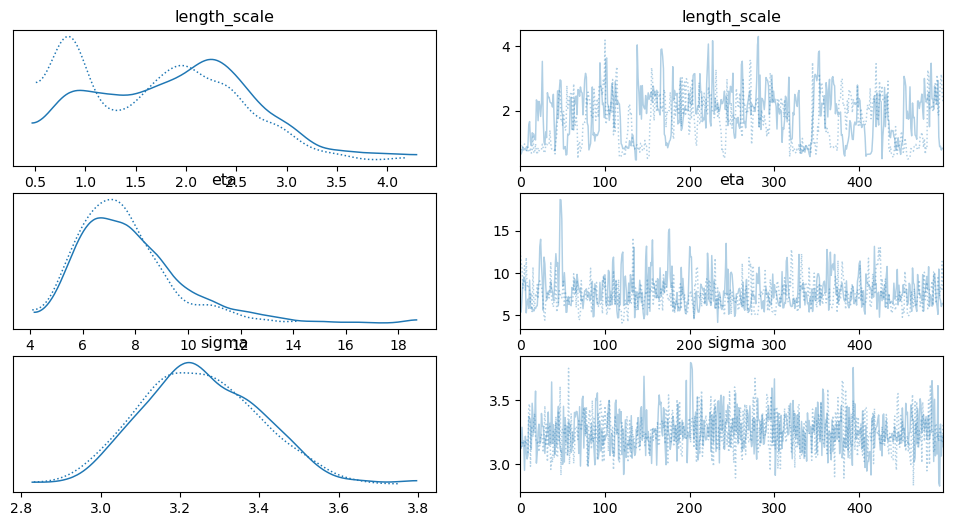

In [21]:
az.plot_trace(trace, var_names=["length_scale", "eta", "sigma"])

array([<Axes: title={'center': 'length_scale'}>,
       <Axes: title={'center': 'eta'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

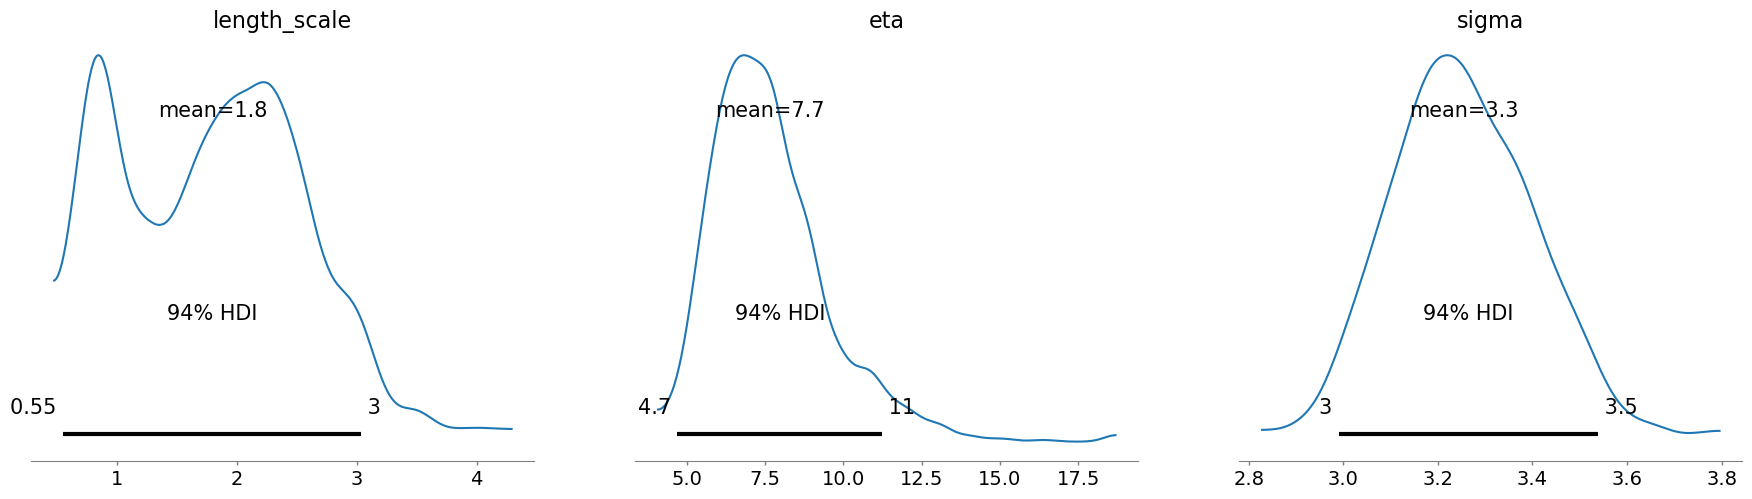

In [22]:
az.plot_posterior(trace, var_names=["length_scale", "eta", "sigma"])

In [49]:
with gp_model:
    pred_ = gp.conditional("prediction", X_pred, jitter=1e-6)
    post_pred = pm.sample_posterior_predictive(trace, var_names=["prediction"], random_seed=30)

Sampling: [prediction]


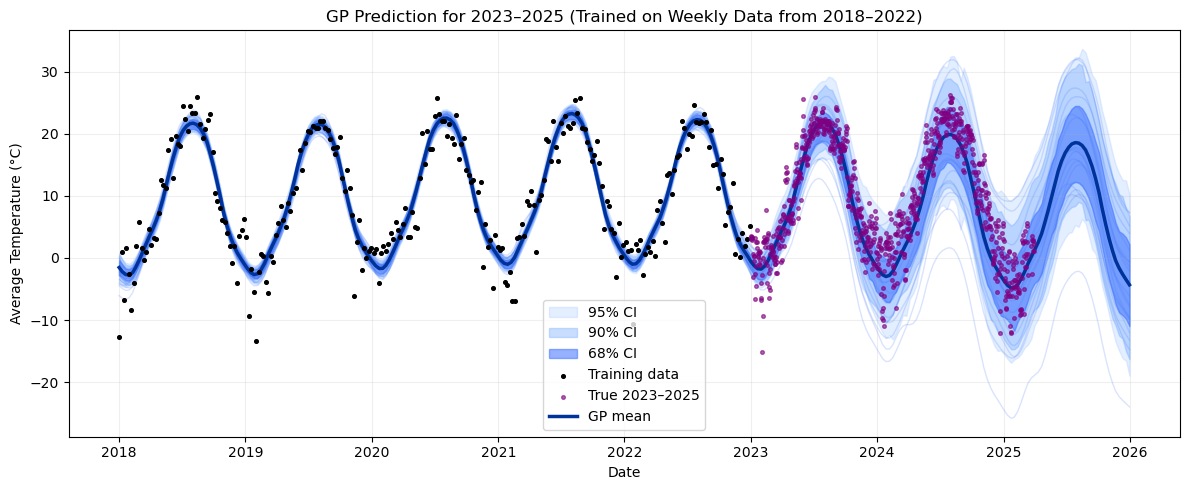

In [104]:
samples = post_pred.posterior_predictive["prediction"].values.reshape(-1, len(X_pred))
mean = samples.mean(axis=0)

# Multiple HDIs for layered band
hpd_68 = az.hdi(samples, hdi_prob=0.68)
hpd_90 = az.hdi(samples, hdi_prob=0.90)
hpd_95 = az.hdi(samples, hdi_prob=0.95)

# True data (2023–2025)
true_df = df[(df.index.year >= 2023) & (df.index.year <= 2025)].copy()
X_true_raw = true_df['day_ordinal'].values[:, None]
X_true_scaled = (X_true_raw - X_ref) / 365
y_true = true_df['tavg'].values
true_dates = true_df.index

plt.figure(figsize=(12, 5))

# Confidence bands
plt.fill_between(X_pred_dates, hpd_95[:, 0], hpd_95[:, 1], color="#a5c9ff", alpha=0.3, label="95% CI")
plt.fill_between(X_pred_dates, hpd_90[:, 0], hpd_90[:, 1], color="#7aadff", alpha=0.4, label="90% CI")
plt.fill_between(X_pred_dates, hpd_68[:, 0], hpd_68[:, 1], color="#3f72ff", alpha=0.55, label="68% CI")

# Posterior function samples
for i in range(20):
    plt.plot(X_pred_dates, samples[i], color="#4677f5", alpha=0.2, linewidth=1)

# Training data and truth
plt.scatter(train_df.index, y_train, s=7, color="black", label="Training data", zorder=5)
plt.scatter(true_dates, y_true, s=7, color="purple", label="True 2023–2025", zorder=5, alpha=0.6)

# Posterior mean
plt.plot(X_pred_dates, mean, label="GP mean", color="#003399", linewidth=2.5)

plt.title("GP Prediction for 2023–2025 (Trained on Weekly Data from 2018–2022)")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()


We used a GP to predict average daily temperatures at the Toronto Island Airport for the years 2023–2025, leveraging weekly training data from 2018–2022. To improve numerical stability and interpretability of the kernel hyperparameters, we rescaled the input time axis: each day was mapped to a real number representing years since the start of the dataset. We used a periodic kernel in addition to a RBF kernel, which reflects our prior belief in smooth, regular seasonal cycles in temperature data. The mean function was set to zero, and model hyperparameters were learned via marginal likelihood optimization in PyMC.

Once fitted, the model generated posterior predictive distributions for the years 2023–2025. We visualized the posterior predictive mean along different credible intervals, as well as function samples from the posterior. The model effectively captured the seasonal trend and extrapolated the cyclic behavior into the future with increasing uncertainty, as expected.

In [105]:
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

# Convert datetime objects to ordinals (numerical scale for interpolation)
x_pred_ordinals = np.array([dt.toordinal() for dt in X_pred_dates])
x_true_ordinals = true_df['day_ordinal'].values

# Interpolate GP mean and HPD bounds to match true date points
interp_mean = interp1d(x_pred_ordinals, mean, kind='linear', fill_value="extrapolate")
interp_lower = interp1d(x_pred_ordinals, hpd[:, 0], kind='linear', fill_value="extrapolate")
interp_upper = interp1d(x_pred_ordinals, hpd[:, 1], kind='linear', fill_value="extrapolate")

# Evaluate interpolated predictions at the true points
y_pred_interp = interp_mean(x_true_ordinals)
lower_bound = interp_lower(x_true_ordinals)
upper_bound = interp_upper(x_true_ordinals)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred_interp))
print("RMSE:", round(rmse, 2))

# 95% Coverage
coverage = np.mean((y_true >= lower_bound) & (y_true <= upper_bound))
print("95% CI Coverage:", f"{coverage * 100:.2f}%")


RMSE: 3.93
95% CI Coverage: 94.21%


## Q3 BNN with VI

MCMC methods still scale poorly with data size, and become prohibitive for more than a few thousand observations. A more scalable alternative to sampling is variational inference (VI), which re-frames the problem of computing the posterior distribution as an optimization problem.

In [8]:
import pytensor
import pytensor.tensor as at

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [9]:
data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())
print(df.columns)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [10]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']].values.astype(np.float32)
y = df['MedHouseVal'].values.astype(np.float32).reshape(-1, 1)

# Standardize the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()  # Flatten target to a 1D array

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [17]:
with pm.Model() as neural_network:
    # Use pm.Data containers so that we can later swap in test data
    X_data = pm.MutableData("X_data", X_train)
    y_data = pm.MutableData("y_data", y_train)

    
    n_features = X_train.shape[1]
    n_hidden = 20
    
    # Hidden layer with tanh activation
    w1 = pm.Normal("w1", mu=0, sigma=1, shape=(n_features, n_hidden))
    b1 = pm.Normal("b1", mu=0, sigma=1, shape=(n_hidden,))
    hidden = at.tanh(at.dot(X_data, w1) + b1)
    
    # Output layer
    w2 = pm.Normal("w2", mu=0, sigma=1, shape=(n_hidden, 1))
    b2 = pm.Normal("b2", mu=0, sigma=1, shape=(1,))
    output = at.dot(hidden, w2) + b2
    
    # Likelihood: we assume the observed target is normally distributed around the network output
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_hat = pm.Normal("y_hat", mu=output.flatten(), sigma=sigma, observed=y_data)
    
    # Inference with ADVI
    approx = pm.fit(n=20000, method="advi")
    trace = approx.sample(1000)

Finished [100%]: Average Loss = 20,640


In [18]:
with neural_network:
    # Replace the training data with test data.
    pm.set_data({"X_data": X_test, "y_data": y_test})
    # Generate posterior predictive samples.
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_hat"])
    
# Compute the mean prediction for each test data point.
y_pred = ppc.posterior_predictive["y_hat"].mean(dim=["chain", "draw"]).values

# Optionally, compute a simple RMSE (in the scaled space).
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Test RMSE (scaled): {rmse:.3f}")

Sampling: [y_hat]


Test RMSE (scaled): 0.678


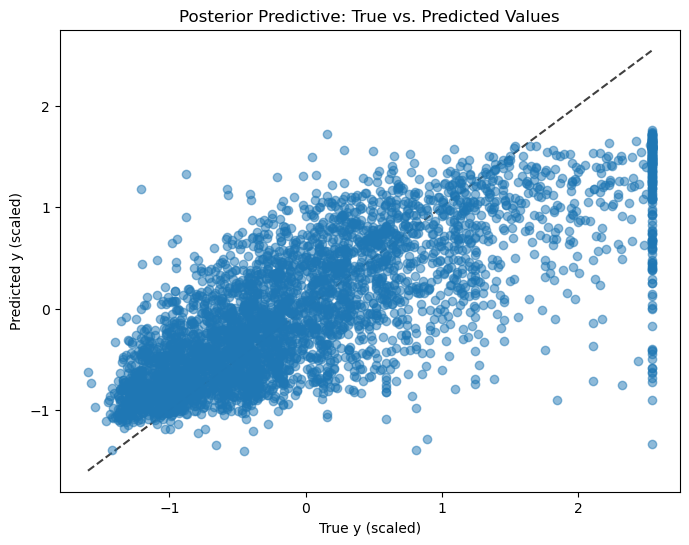

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True y (scaled)")
plt.ylabel("Predicted y (scaled)")
plt.title("Posterior Predictive: True vs. Predicted Values")
# Plot a diagonal line for reference.
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "k--", alpha=0.75, zorder=0)
plt.show()

In [30]:
y_pred_unscaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse_unscaled = np.sqrt(np.mean((y_test_unscaled - y_pred_unscaled)**2))
print(f"Test RMSE (unscaled): {rmse_unscaled:.3f}")


Test RMSE (unscaled): 0.740


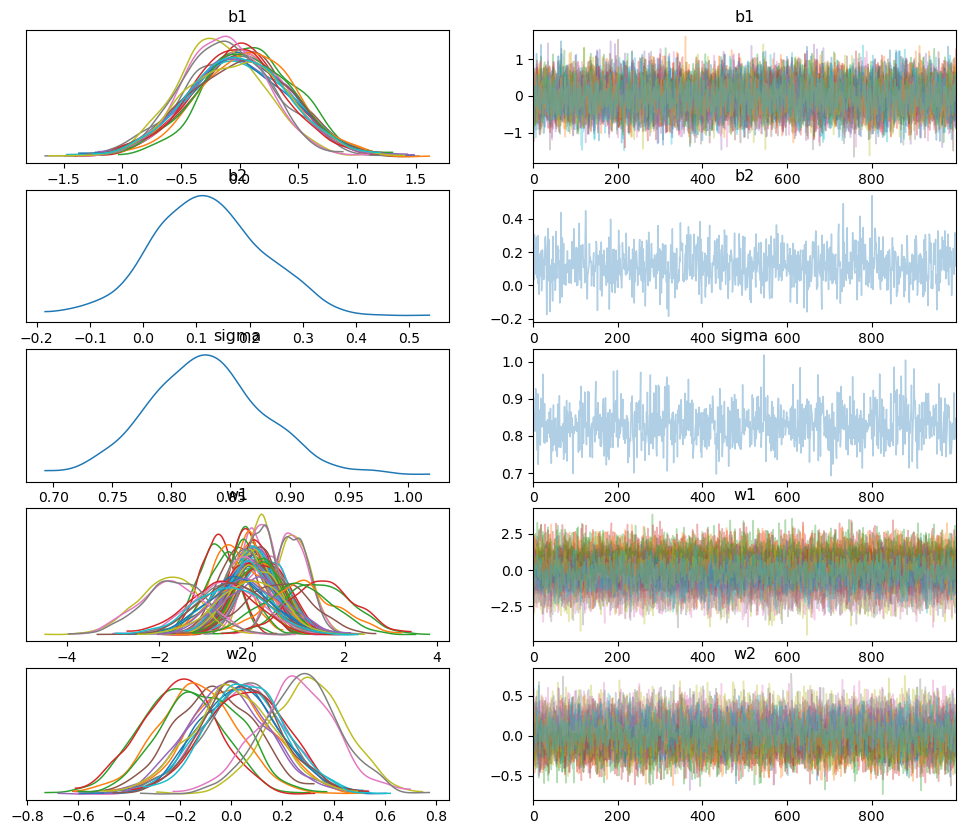

In [21]:
az.plot_trace(trace)
plt.show()

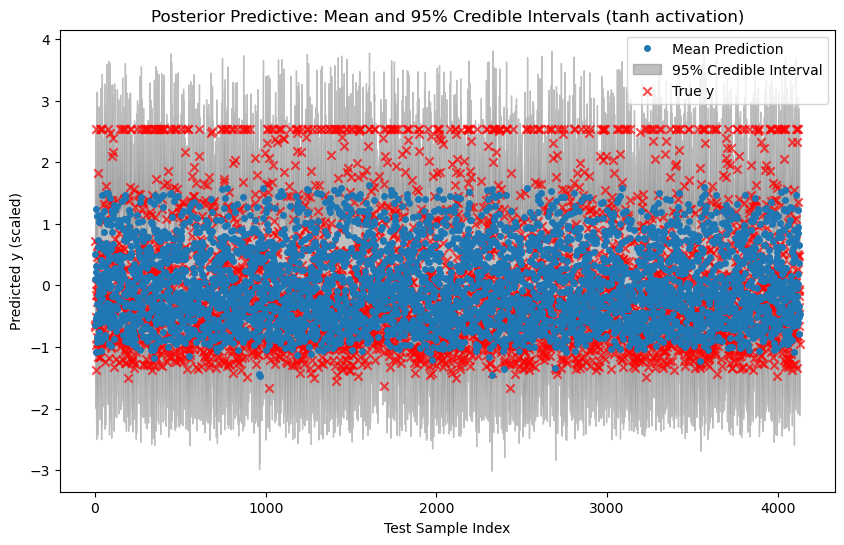

In [25]:
y_hat_samples = ppc.posterior_predictive["y_hat"].values

# Compute mean and 95% credible intervals (5th and 95th percentiles) across chain and draw dimensions.
y_hat_mean = np.mean(y_hat_samples, axis=(0, 1))
y_hat_lower = np.percentile(y_hat_samples, 7.5, axis=(0, 1))
y_hat_upper = np.percentile(y_hat_samples, 97.5, axis=(0, 1))

# Plot the mean predictions and credible intervals along with the true target values.
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(y_hat_mean))
plt.plot(x_axis, y_hat_mean, "o", label="Mean Prediction", markersize=4)
plt.fill_between(x_axis, y_hat_lower, y_hat_upper, color="gray", alpha=0.5, label="95% Credible Interval")
plt.scatter(x_axis, y_test, color="red", alpha=0.7, label="True y", marker="x")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted y (scaled)")
plt.title("Posterior Predictive: Mean and 95% Credible Intervals (tanh activation)")
plt.legend()
plt.show()


The goal was to predict median house values based on a subset of predictors: median income, house age, average rooms, and average occupancy. The target and input variables were scaled to improve convergence and network stability.

### Model Architecture and Inference

The network consisted of a single hidden layer with 20 units and a tanh activation function, which we found to perform better than ReLU in this context. The weights and biases were given standard normal priors, and the likelihood was modeled as a Gaussian distribution with unknown standard deviation, modeled via a half-normal prior. We used ADVI with 20,000 iterations and drew 1,000 samples from the approximated posterior for posterior predictive analysis.

The ELBO converged smoothly, indicating that the variational approximation stabilized. The trace plots of the weights, biases, and noise parameter `sigma` showed well-mixed, stationary behavior, suggesting that the approximation explored the posterior space effectively.

### Predictive Performance

On the held-out test set, the model achieved a **scaled RMSE of approximately 0.678**, which is reasonable given the simplicity of the network and the limited number of input features. The scatter plot of predicted vs. true values shows that most predictions cluster around the diagonal, suggesting a relatively good overall fit. However, the plot also reveals some deviation in higher-value predictions, where the model tends to underpredict—likely due to data scarcity or higher variance in those regions.

### Uncertainty Estimation

A key advantage of Bayesian neural networks is their ability to quantify predictive uncertainty. We examined the 95% CIs around the predictions. The posterior predictive plot shows that the true target values often fall within these intervals, indicating that the model’s uncertainty estimates are meaningful. However, in some regions (notably for extreme values), the intervals are wide, reflecting higher epistemic uncertainty—a desirable property of the model.
